This notebook contains code for performing Clustering with K-Means on data involving land uses around transit stations. It also includes code for calculating a TOD score, a TOD potential score, and a composite score that takes into account the TOD Score, the TOD Potential Score, and station proximity ranking.

## **Import Libraries and Load Data**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Load your data
file_path = '/content/Data for Clusteringv2.csv'  # Change this to your actual file path
data = pd.read_csv(file_path)

In [1]:
import pandas as pd

## **Determine the Optimal Number of Clusters**

In [ ]:
# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
range_values = range(2, 11)  # Adjust this range if needed

for k in range_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)
    # Compute the silhouette score for each number of clusters
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# **Plot the Elbow Method Results**

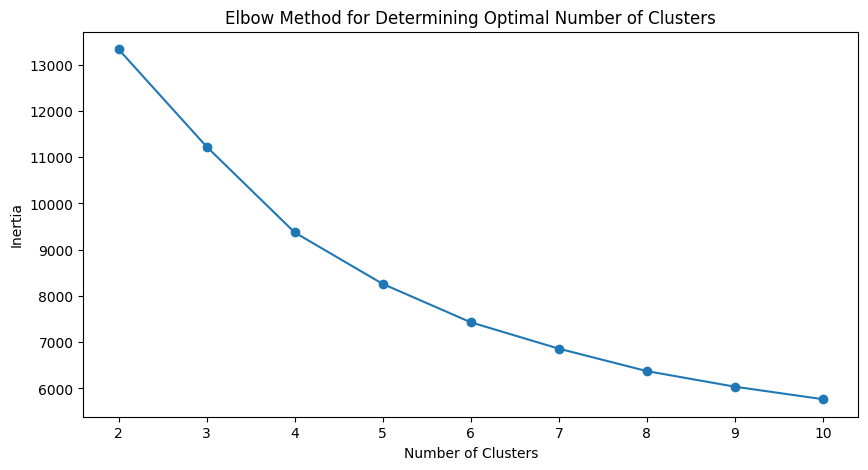

In [ ]:
# Plotting the elbow method graph
plt.figure(figsize=(10, 5))
plt.plot(range_values, inertia, marker='o')
plt.title('Elbow Method for Determining Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# **Plot Silhouette Score Results**

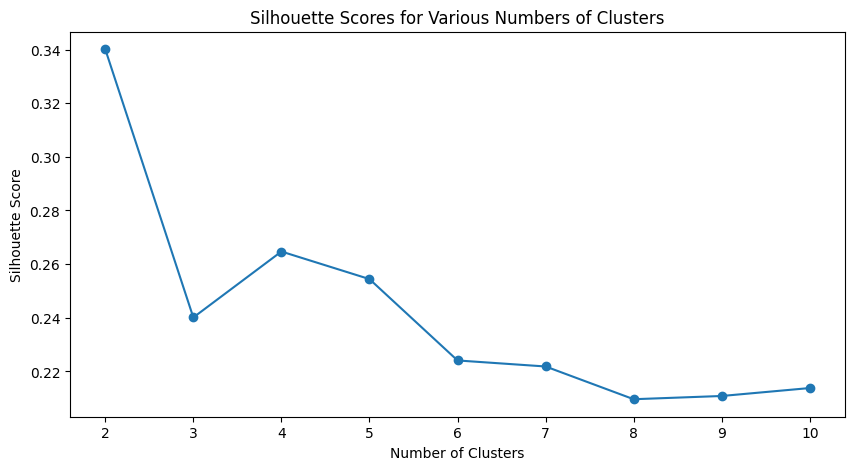

In [ ]:
# Plotting the silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range_values, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Various Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

# Assuming 'kmeans' is your KMeans model after fitting with k=6
# And 'data_scaled' is your standardized data used for clustering

# Inertia
inertia = kmeans.inertia_

# Silhouette Score
silhouette_avg = silhouette_score(data_scaled, kmeans.labels_)

# Print the results
print(f'Inertia for k=6: {inertia}')
print(f'Silhouette Score for k=6: {silhouette_avg}')


Inertia for k=6: 5765.869672629378
Silhouette Score for k=6: 0.21382206124200695


# **Compare Inertia and Silhouette Score**

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'data_scaled' is your standardized data

# Initialize lists to store the results
ks = [4, 5, 6, 7]
inertias = []
silhouette_scores = []

# Compute K-means, inertia, and silhouette score for each k
for k in ks:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'k': ks,
    'Inertia': inertias,
    'Silhouette Score': silhouette_scores
})

# Print the results table
results_df.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,k,Inertia,Silhouette Score
0,4,9372.615405,0.264706
1,5,8259.454807,0.254432
2,6,7429.419680,0.224105
3,7,6858.987554,0.221857


## **Cluster with K=6 and Get Summary Statistics**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the updated dataset
data_updated = pd.read_csv('/content/Data for Clusteringv2.csv')  # Update with the correct path

# Remove the 'Facility ID' column
data_updated.drop('Facility ID', axis=1, inplace=True)

# Preprocess the data: Standardize the features including 'Designated Land Use'
features_to_standardize = ['Building Count', 'Building Footprint', 'Walks Score', 'Amenities', 'Designated Land Use']
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_updated[features_to_standardize])

# Execute K-means clustering
kmeans = KMeans(n_clusters=6, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

# Append the cluster labels to your dataframe
data_updated['Cluster'] = clusters

# Analyze the new cluster distribution and characteristics, rounding as specified
cluster_means = data_updated.groupby('Cluster').mean()
cluster_means['Building Count'] = cluster_means['Building Count'].round(0)
cluster_means['Building Footprint'] = cluster_means['Building Footprint'].round(0)
cluster_means['Walks Score'] = cluster_means['Walks Score'].round(1)
cluster_means['Amenities'] = cluster_means['Amenities'].round(1)
cluster_means['Designated Land Use'] = cluster_means['Designated Land Use'].round(1)

# Display the updated cluster means
cluster_means


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Building Count,Building Footprint,Walks Score,Amenities,Designated Land Use
Cluster,,,,,
0,1162.0,280280.0,22.1,8.6,1.0
1,579.0,448795.0,23.9,47.4,1.5
2,231.0,126126.0,21.4,3.0,0.6
3,170.0,108881.0,14.1,2.3,0.5
4,314.0,332684.0,23.2,13.2,2.2
5,224.0,156762.0,16.0,4.2,2.3


In [ ]:
# Count the number of Facility IDs in each cluster
cluster_counts = data_updated['Cluster'].value_counts()

# Sort the counts by cluster number for better readability
cluster_counts = cluster_counts.sort_index()

# Print the results
print(cluster_counts)


Cluster
0    392
1    174
2    889
3    964
4    556
5    838
Name: count, dtype: int64


In [ ]:
# Map cluster numbers to names
cluster_names = {
    0: 'High Density Residential',
    1: 'Commercial Hub',
    2: 'Low Density Suburban',
    3: 'Sparse Suburban',
    4: 'Mixed-Use Urban',
    5: 'Emerging Mixed-Use'
}
data_updated['Cluster Name'] = data_updated['Cluster'].map(cluster_names)

# Define the path for the new CSV file
output_csv_path = '/content/Data_with_Clusters.csv'

# Save the DataFrame to a CSV file
data_updated.to_csv(output_csv_path, index=False)

# Code to download the file (specific to Google Colab)
from google.colab import files
files.download(output_csv_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Plot the Clusters**

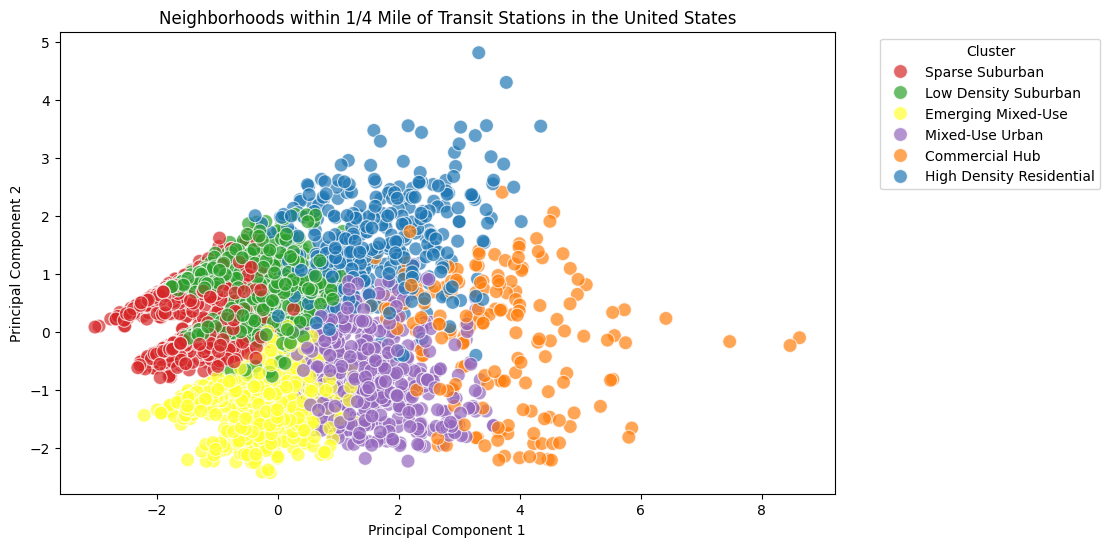

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA on the scaled data
pca = PCA(n_components=2)  # Reduce data to two principal components for visualization
data_scaled = scaler.fit_transform(data_updated[features_to_standardize])  # Assuming this is your scaled data
principal_components = pca.fit_transform(data_scaled)

# Create a new DataFrame for the PCA results
data_updated_pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
data_updated_pca_df['Cluster'] = data_updated['Cluster']  # Add the cluster information

# Update your custom color palette with the new cluster names
custom_palette = {
    'High Density Residential': '#1f77b4',  # Blue
    'Commercial Hub': '#ff7f0e',            # Orange
    'Low Density Suburban': '#2ca02c',      # Green
    'Sparse Suburban': '#d62728',           # Red
    'Mixed-Use Urban': '#9467bd',           # Purple
    'Emerging Mixed-Use': '#ffff33'         # Yellow, adjust if needed
}

# Map the cluster numbers to names for PCA DataFrame
data_updated_pca_df['Cluster Name'] = data_updated_pca_df['Cluster'].map(cluster_names)

# Create a scatter plot of the two principal components using the custom palette
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_updated_pca_df, x='PC1', y='PC2', hue='Cluster Name', palette=custom_palette, s=100, alpha=0.7)
plt.title('Neighborhoods within 1/4 Mile of Transit Stations in the United States')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
plt.show()


## **TOD Score**

In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
new_file_path = '/content/Data_with_Clusters_V2 (2).csv'  # Update if different
data = pd.read_csv(new_file_path)

# Columns involved in TOD Score calculation
columns_for_tod = ['Building Count', 'Building Footprint', 'Walk Score', 'Amenities', 'Designated Land Use']

# Normalize these columns
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data[columns_for_tod])
data_normalized = pd.DataFrame(data_normalized, columns=columns_for_tod)

# Weights as per your specification
weights = {'Building Count': 0.20, 'Building Footprint': 0.20, 'Walk Score': 0.20, 'Amenities': 0.20, 'Designated Land Use': 0.10}

# Calculate the TOD Score
data['TOD_Score'] = (weights['Building Count'] * data_normalized['Building Count'] +
                     weights['Building Footprint'] * data_normalized['Building Footprint'] +
                     weights['Walk Score'] * data_normalized['Walk Score'] +
                     weights['Amenities'] * data_normalized['Amenities'] +
                     weights['Designated Land Use'] * data_normalized['Designated Land Use'])

# Save the updated DataFrame with TOD scores back to a new CSV file
output_file_path = 'Data_with_TOD_Scores2.csv'  # Update as needed
data.to_csv(output_file_path, index=False)

output_file_path  # Return the path for download


'Data_with_TOD_Scores2.csv'

In [4]:
# Code to download the file (specific to Google Colab)
from google.colab import files
files.download(output_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

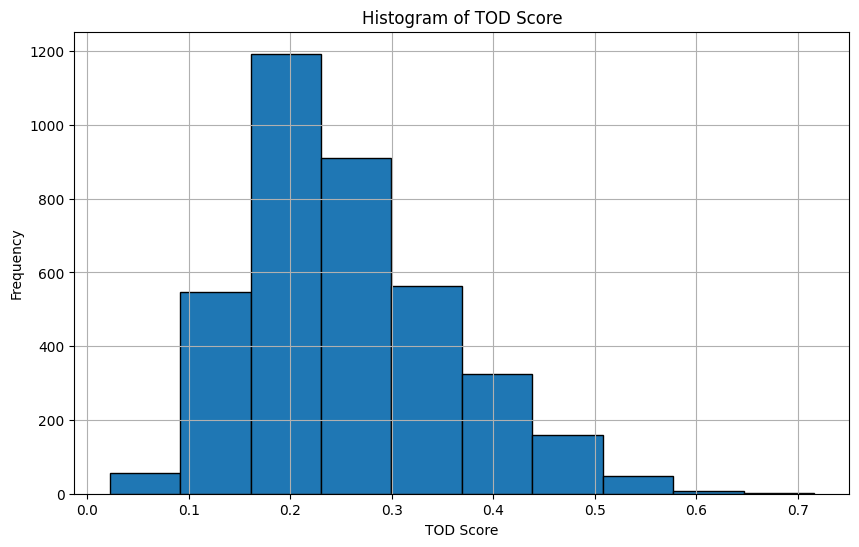

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'YourColumnName' with the actual column name you want to plot
COLUMN_NAME = 'TOD Score'
FILE_PATH = '/content/TODScore.csv'  # Replace with your file path

try:
    # Load the CSV file
    data = pd.read_csv(FILE_PATH)

    # Plot a 10-bin histogram for the specified column
    plt.figure(figsize=[10,6])
    plt.hist(data[COLUMN_NAME], bins=10, edgecolor='black')
    plt.title('Histogram of ' + COLUMN_NAME)
    plt.xlabel(COLUMN_NAME)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()
except Exception as e:
    print(f"An error occurred: {e}")


## **TOD Opportunity Scoring**

In [7]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the data
file_path = '/content/Data_with_TOD_Potential_Scores.csv'  # Update if different
data = pd.read_csv(file_path)

# Filter out records where any of the percentage variables exceed 1
filtered_data = data[(data['% Building Footprint'] <= 1) &
                     (data['% Parking'] <= 1) &
                     (data['% Natural Features'] <= 1)]

# Normalize the percentage columns
scaler = MinMaxScaler()
columns_to_normalize = ['% Building Footprint', '% Parking', '% Natural Features']
filtered_data[columns_to_normalize] = scaler.fit_transform(filtered_data[columns_to_normalize])

# Define weights for the TOD potential score calculation
weights = {'% Parking': 0.5,  # More parking space indicates more opportunities for development
           '% Building Footprint': -0.25,  # Less available land for development reduces TOD potential
           '% Natural Features': -0.25}  # Natural features limit development possibilities

# Calculate the TOD Potential Score
filtered_data['TOD_Potential_Score'] = (weights['% Parking'] * filtered_data['% Parking'] +
                                        weights['% Building Footprint'] * filtered_data['% Building Footprint'] +
                                        weights['% Natural Features'] * filtered_data['% Natural Features'])

# Adjust scores to ensure all are positive if needed
min_score = filtered_data['TOD_Potential_Score'].min()
if min_score < 0:
    filtered_data['TOD_Potential_Score'] += abs(min_score)

# Save the updated DataFrame with TOD Potential scores back to a new CSV file
output_file_path = 'Data_with_TOD_Potential_Scores.csv'
filtered_data.to_csv(output_file_path, index=False)

output_file_path  # Provide the path for download


'Data_with_TOD_Potential_Scores.csv'

In [ ]:
from google.colab import files
files.download(output_file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **TOD Potential score Historgram**

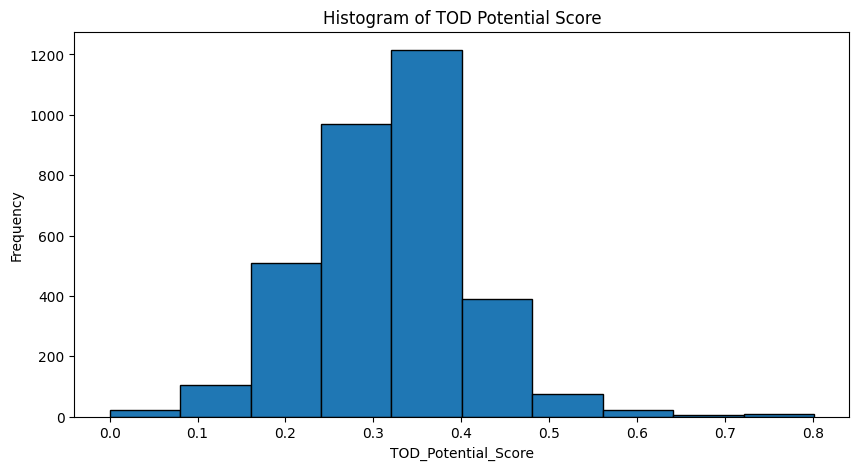

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Replace 'your_file_path.csv' with the path to your actual file
file_path = 'your_file_path.csv'
data = pd.read_csv('/content/Data_with_TOD_Potential_Scores.csv')

# Check if 'TOD potential score' column exists
if 'TOD_Potential_Score' in data.columns:
    # Creating the histogram
    plt.figure(figsize=[10,5])
    data['TOD_Potential_Score'].hist(bins=10, edgecolor='black')
    plt.title('Histogram of TOD Potential Score')
    plt.xlabel('TOD_Potential_Score')
    plt.ylabel('Frequency')
    plt.grid(False)  # Turn off grid to make plot cleaner
    plt.show()
else:
    print("'TOD potential score' column does not exist in the dataset.")


In [9]:
data.describe()

,Facility ID,Building Count,Building Footprint,Walk Score,Amenities,Designated Land Use,Cluster,Proximity Score,TOD_Score,% Building Footprint,% Parking,% Natural Features,TOD_Potential_Score
count,3323.000000,3323.00000,3323.000000,3323.00000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000,3323.000000
mean,8754.782726,352.72585,192777.423112,18.90310,7.092687,1.298224,2.978935,1.811616,0.238295,0.377367,0.112213,0.154237,0.319956
std,5835.818374,387.64409,126214.505443,5.01139,10.997913,0.965924,1.578617,0.995485,0.090091,0.243000,0.123821,0.210187,0.091026
min,168.000000,0.00000,0.000000,3.00000,0.000000,0.000000,0.000000,1.000000,0.015000,0.000000,0.000000,0.000000,0.000000
25%,4136.500000,77.00000,99987.000000,15.00000,1.000000,1.000000,2.000000,1.000000,0.171000,0.200000,0.022000,0.011000,0.259500
50%,7322.000000,214.00000,178132.000000,19.00000,3.000000,1.000000,3.000000,2.000000,0.227000,0.350000,0.075000,0.065000,0.324250
75%,14752.500000,497.50000,269588.000000,22.00000,9.000000,2.000000,4.000000,2.000000,0.295500,0.530000,0.164000,0.211000,0.380500
max,20488.000000,3326.00000,812495.000000,30.00000,149.000000,3.000000,5.000000,4.000000,0.558000,1.000000,1.000000,1.000000,0.801500


In [10]:
tod_scores = data['TOD_Potential_Score']
tod_scores.describe()

count    3323.000000
mean        0.319956
std         0.091026
min         0.000000
25%         0.259500
50%         0.324250
75%         0.380500
max         0.801500
Name: TOD_Potential_Score, dtype: float64

# **100 Stations with the Highest TOD Score, Potential Score, and Proximity Score**

In [14]:
import pandas as pd

# Load the file
file_path = '/content/Data_with_TOD_Potential_Scores (1).csv'  # Replace '/path/to/your/file.csv' with the actual file path
data = pd.read_csv(file_path)

# Rank each of the three scores (lower rank means higher score).
data['TOD Score Rank'] = data['TOD_Score'].rank(ascending=False)
data['TOD Potential Score Rank'] = data['TOD_Potential_Score'].rank(ascending=False)
data['Proximity Score Rank'] = data['Proximity Score'].rank(ascending=False)

# Compute a composite score by summing the ranks. Lower composite score means higher overall ranking.
data['Composite Rank'] = data['TOD Score Rank'] + data['TOD Potential Score Rank'] + data['Proximity Score Rank']

# Select the top 100 facilities based on the composite rank.
top_100_facilities = data.nsmallest(100, 'Composite Rank')

# Save the filtered data to a new CSV file.
output_file_path = 'Scores'  # Replace '/path/to/output/file.csv' with the desired output file path
top_100_facilities.to_csv(output_file_path, index=False)

print(f"The top 100 facilities file has been saved to: {output_file_path}")


The top 100 facilities file has been saved to: Scores
